**EDA**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [11]:
audio1="/content/drive/MyDrive/urban dataset/100648-1-0-0.wav"

In [12]:
data,sr1=librosa.load(audio1)
ipd.Audio(audio1)

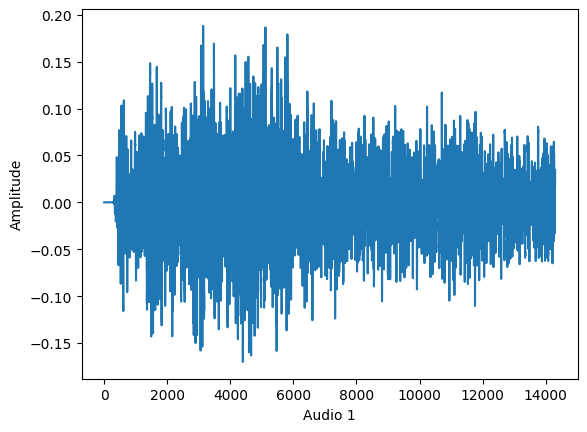

In [13]:
plt.plot(data)
plt.xlabel('Audio 1')
plt.ylabel('Amplitude')
plt.show()

In [14]:
from scipy.io import wavfile as wav
wavesr2, wave_audio=wav.read(audio1)

In [15]:
wavesr2

44100

In [16]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [1043, 1043],
       [1026, 1026],
       [1073, 1073]], dtype=int16)

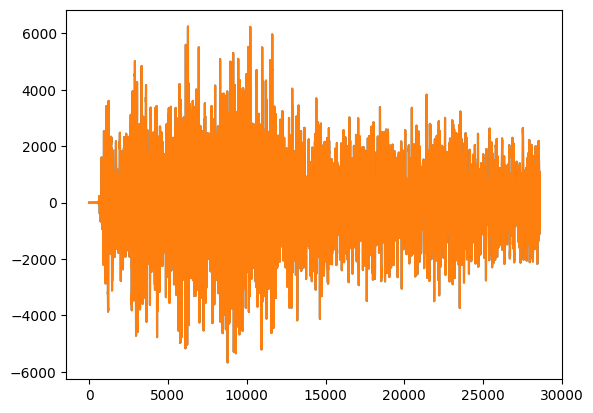

In [17]:
plt.plot(wave_audio)
plt.show()

In [18]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/urban dataset/UrbanSound8K.csv")

In [19]:
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [21]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [22]:
mfccs = librosa.feature.mfcc(y=data, sr=sr1, n_mfcc=40)
print(mfccs)
print(mfccs.shape)


[[-3.50337860e+02 -2.36006485e+02 -1.99549072e+02 ... -1.96953857e+02
  -2.00550201e+02 -2.06404999e+02]
 [ 1.30763702e+02  1.23476776e+02  1.16075668e+02 ...  1.03111763e+02
   9.58280182e+01  1.01292206e+02]
 [ 4.07228422e+00  9.29231453e+00  2.58745551e+00 ... -5.87990570e+00
  -1.78674579e-01  5.56627989e-01]
 ...
 [-6.21877193e+00 -4.94142103e+00  7.25932240e-01 ...  1.50536358e+00
  -3.53703070e+00 -1.86897838e+00]
 [ 8.20162392e+00  1.56167555e+00 -4.18309975e+00 ... -2.91617060e+00
  -7.82344639e-01  3.90978932e-01]
 [-8.63109016e+00 -2.89507651e+00 -3.83393478e+00 ... -2.25498438e+00
   2.39101219e+00  3.70793033e+00]]
(40, 28)


***Preprocessing***

In [23]:
def features_extractor(file):
  audio, sample_rate = librosa.load(file)
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc= 40);
  mfccs_scaled_features = np.mean(mfccs.T, axis=0)

  return mfccs_scaled_features

In [25]:
metadata = pd.read_csv('/content/drive/MyDrive/urban dataset/UrbanSound8K.csv')


extracted_features = []
for index, row in metadata.iterrows():
  if(row['fold']==10):
    file_path = "/content/drive/MyDrive/urban dataset/"+ str(row['slice_file_name'])
    label = row['class']
    data = features_extractor(file_path)
    extracted_features.append([data,label])

extracted_features

[[array([-188.62563  ,  102.429115 ,   -2.3306003,  -10.946155 ,
           -8.982675 ,  -15.690951 ,  -30.03551  ,   -6.154767 ,
           -9.007838 ,  -12.61334  ,  -10.587378 ,   -1.1968123,
          -13.455125 ,  -11.810285 ,  -12.847272 ,   -1.9622475,
           -8.531766 ,   -4.870482 ,   -8.739532 ,    3.8686159,
           -2.2428453,    2.477431 ,   -1.1134602,   -2.6317515,
           -6.880269 ,   -2.8229277,   -6.5258565,   -2.5448496,
           -5.2719946,    3.697618 ,   -8.957408 ,   -1.2020588,
           -2.044166 ,    3.8393345,   -6.980767 ,   -4.8108335,
           -1.7235421,    3.730234 ,   -5.9274936,   -0.9260198],
        dtype=float32),
  'car_horn'],
 [array([-195.3337    ,   99.1228    ,  -16.376385  ,    2.7363458 ,
          -14.817549  ,  -22.510544  ,  -14.410312  ,   -6.2838273 ,
          -17.809626  ,   -0.27872986,  -11.931999  ,   -3.0626035 ,
          -15.994422  ,   -1.8626719 ,   -6.700394  ,   -9.548225  ,
           -8.267224  ,   -6.79286

In [26]:
features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
features_df.head()

,feature,class
0,"[-188.62563, 102.429115, -2.3306003, -10.94615...",car_horn
1,"[-195.3337, 99.1228, -16.376385, 2.7363458, -1...",car_horn
2,"[-200.00314, 79.35082, -13.392574, 17.59861, -...",car_horn
3,"[-196.05116, 90.81921, -17.248508, 14.915048, ...",car_horn
4,"[-114.125336, 53.49515, -10.338029, 10.012977,...",car_horn


In [27]:
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [28]:
y.shape

(837, 10)

In [29]:
originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']
Encoded labels:  [0 1 2 3 4 5 6 7 8 9]


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [31]:
X_train.shape

(669, 40)

In [32]:
X_test.shape

(168, 40)

In [33]:
y_train.shape

(669, 10)

In [34]:
y_test.shape

(168, 10)

***Building the Model***

In [35]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [37]:
num_labels = y.shape[1]

In [38]:
model = Sequential()

#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4100      
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 activation_4 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)              

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [41]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='saved_model.hdf5',verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),  verbose=1,callbacks=[checkpointer])
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
18/21 [========================>.....] - ETA: 0s - loss: 46.3765 - accuracy: 0.1111
Epoch 1: val_loss improved from inf to 6.34624, saving model to saved_model.hdf5
21/21 [==============================] - 2s 33ms/step - loss: 43.3560 - accuracy: 0.1166 - val_loss: 6.3462 - val_accuracy: 0.2738
Epoch 2/100
12/21 [================>.............] - ETA: 0s - loss: 22.2513 - accuracy: 0.1094

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 6.34624 to 3.04903, saving model to saved_model.hdf5
21/21 [==============================] - 0s 11ms/step - loss: 20.4274 - accuracy: 0.1151 - val_loss: 3.0490 - val_accuracy: 0.2798
Epoch 3/100
20/21 [===========================>..] - ETA: 0s - loss: 13.1013 - accuracy: 0.1312
Epoch 3: val_loss improved from 3.04903 to 2.14106, saving model to saved_model.hdf5
21/21 [==============================] - 0s 11ms/step - loss: 12.9519 - accuracy: 0.1315 - val_loss: 2.1411 - val_accuracy: 0.2143
Epoch 4/100
11/21 [==============>...............] - ETA: 0s - loss: 9.4338 - accuracy: 0.1250
Epoch 4: val_loss did not improve from 2.14106
21/21 [==============================] - 0s 8ms/step - loss: 8.9870 - accuracy: 0.1315 - val_loss: 2.1574 - val_accuracy: 0.2321
Epoch 5/100
14/21 [===================>..........] - ETA: 0s - loss: 7.6172 - accuracy: 0.1250
Epoch 5: val_loss did not improve from 2.14106
21/21 [==============================] - 0s 6ms/step - los

In [42]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.613095223903656


In [43]:
file ="/content/drive/MyDrive/urban dataset/100795-3-1-0.wav"
x,sr1 = librosa.load(file)
ipd.Audio(x,rate=sr1)

In [45]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class_label = np.argmax(predicted_probabilities)
predicted_class_label = np.array([predicted_class_label])
prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

1/1 [==============================] - 0s 43ms/step
Predicted class: dog_bark
